# Activity 1

In [3]:
from datetime import datetime

my_year = 2019
my_month = 2
my_day = 1
my_hour = 22
my_minute = 30
my_second = 15

my_date = datetime(my_year,my_month,my_day)
print(my_date)
print(my_date.month) 

my_date_time = datetime(my_year,my_month,my_day,my_hour,my_minute,my_second)
print(my_date_time)
print(my_date_time.hour)
print(my_date_time.day)

2019-02-01 00:00:00
2
2019-02-01 22:30:15
22
1


# Activity 2

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime

ind = datetime(2019, 9, 1) + pd.to_timedelta(arg=np.arange(10), unit='D')
ind = pd.DatetimeIndex(ind).to_period('D')

data = 10*np.random.rand(10,2)
cols = ['A','B']

df = pd.DataFrame(data=data,index=ind,columns=cols)
df

,A,B
2019-09-01,3.617026,5.703855
2019-09-02,8.908982,4.167331
2019-09-03,1.865442,7.740093
2019-09-04,3.711312,0.836224
2019-09-05,6.536498,5.321553
2019-09-06,6.177048,9.823535
2019-09-07,2.955323,6.320169
2019-09-08,3.778390,7.578482
2019-09-09,5.597279,8.810072
2019-09-10,0.251793,6.915894


In [3]:
'On {}, the value is {}'.format(df.index[df.index.argmin()], df.index.min())

'On 2019-09-01, the value is 2019-09-01'

# Activity 3

In [13]:
from pandas_datareader import data
goog = data.DataReader('GOOG', start='2006-01-01', end='2019-10-14',data_source='yahoo')
goog.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-10-08,1206.079956,1189.010010,1197.589966,1189.130005,1039300.0,1189.130005
2019-10-09,1208.349976,1197.630005,1199.349976,1202.310059,867700.0,1202.310059
2019-10-10,1215.000000,1197.339966,1198.579956,1208.670044,846600.0,1208.670044
2019-10-11,1228.390015,1213.739990,1222.209961,1215.449951,1272700.0,1215.449951
2019-10-14,1226.329956,1211.760010,1212.339966,1217.140015,867500.0,1217.140015


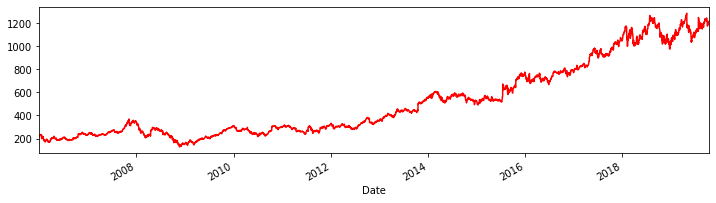

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

data = goog['Close']
data.plot(color='red',style='-',figsize=(12,3))

# Activity 4

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import quandl

houses = quandl.get('ZILLOW/M11_ZRIAH')
houses.head()

,Value
Date,
2010-11-30,2453.0
2010-12-31,2460.0
2011-01-31,2483.0
2011-02-28,2505.0
2011-03-31,2525.0


In [23]:
houses.tail()

,Value
Date,
2019-04-30,3342.0
2019-05-31,3357.0
2019-06-30,3372.0
2019-07-31,3386.0
2019-08-31,3397.0


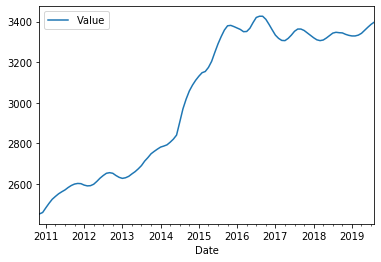

In [24]:
houses.plot()

# Activity 5

In [31]:
data  = quandl.get('FED/RXI_US_N_B_NZ',start_date='2000-01-01',end_date='2019-08-31')

In [32]:
data.head()

,Value
Date,
2000-01-03,0.5254
2000-01-04,0.5198
2000-01-05,0.5171
2000-01-06,0.5145
2000-01-07,0.5160


In [33]:
data.tail()

,Value
Date,
2019-08-26,0.6396
2019-08-27,0.6366
2019-08-28,0.6337
2019-08-29,0.6318
2019-08-30,0.6299


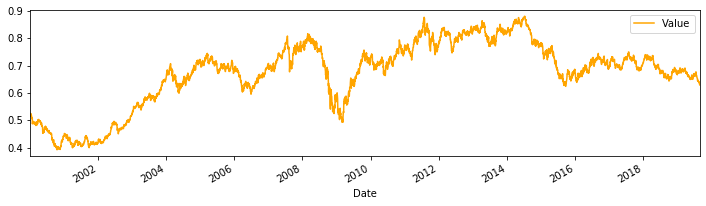

In [36]:
data.plot(color='orange',figsize=(12,3))

# Activity 6

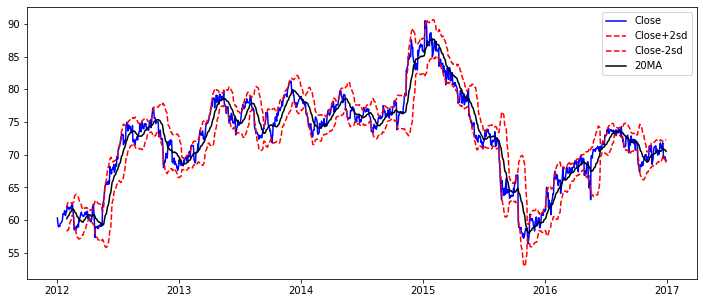

In [53]:
df = pd.read_csv('time_data/walmart_stock.csv',
                 index_col='Date',parse_dates=True)

df['Close: 30 Day Mean'] = df['Close'].rolling(window=20).mean()
df['Upper'] = df['Close: 30 Day Mean'] + 2*df['Close'].rolling(window=20).std()
df['Lower'] = df['Close: 30 Day Mean'] - 2*df['Close'].rolling(window=20).std()

data = df[['Close','Close: 30 Day Mean','Upper','Lower']]

fig,ax = plt.subplots(figsize=(12,5))
ax.plot(df['Close'],color="blue", linestyle='-', label='Close')
ax.plot(df['Upper'],color="red", linestyle='--', label='Close+2sd')
ax.plot(df['Lower'],color="red", linestyle='--', label='Close-2sd')
ax.plot(df['Close: 30 Day Mean'],color="black", linestyle='-', label='20MA')

ax.legend(loc=0)

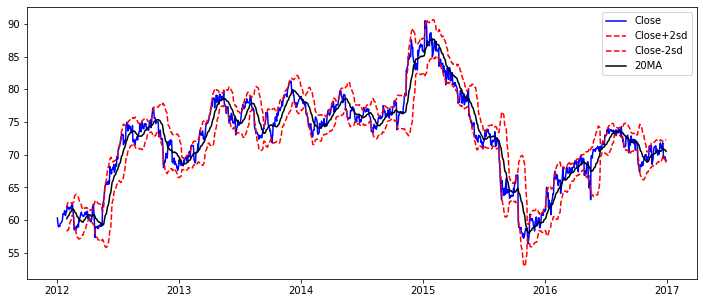

In [57]:
fig = plt.figure(figsize=(12,5))
plt.plot(df['Close'],color="blue", linestyle='-', label='Close')
plt.plot(df['Upper'],color="red", linestyle='--', label='Close+2sd')
plt.plot(df['Lower'],color="red", linestyle='--', label='Close-2sd')
plt.plot(df['Close: 30 Day Mean'],color="black", linestyle='-', label='20MA')

plt.legend(loc=0)

# CH5E - Activity 1

Text(0.5, 1.0, 'Monthly Max Opening Price for Walmart')

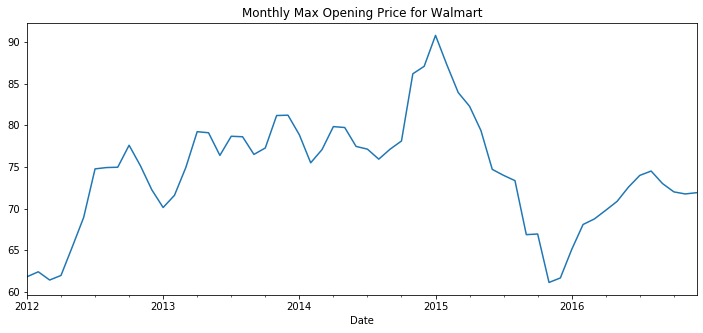

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('time_data/walmart_stock.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

df['Open'].resample('M').max().plot(kind='line',figsize=(12,5))
plt.title('Monthly Max Opening Price for Walmart')

# Activity 7

In [6]:
df.tshift(periods=1,freq='Q').head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-03-31,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-03-31,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-03-31,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-03-31,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-03-31,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


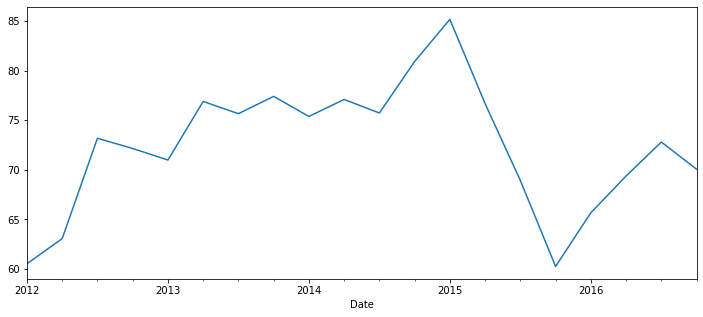

In [9]:
df.tshift(periods=1,freq='Q').resample('Q').mean()['Close'].plot(kind='line',figsize=(12,5))